In [49]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Loading the Excel file
file_path = r'C:\Users\aakas\OneDrive - stevens.edu\Semester 3\Quantitative Hedge fund strategies\S&P500.xlsx'
df = pd.read_excel(file_path)

# Extracting Ticker Symbols
ticker_symbols = df['Ticker Symbol'].tolist()

df = yf.download(ticker_symbols, start='2018-01-01')['Close']

df.index = pd.to_datetime(df.index)

ret_df = df.pct_change()

ret_df

[*********************100%%**********************]  499 of 499 completed


,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.012266,-0.000174,0.015649,NaN,0.002211,0.000906,0.004615,0.018796,0.012406,-0.007733,...,-0.010834,-0.006693,0.019640,-0.003426,0.012193,-0.000858,0.006932,0.019863,-0.001183,0.004598
2018-01-04,0.006305,0.004645,-0.005703,NaN,-0.001697,0.003734,0.011841,0.012042,-0.001094,0.016843,...,0.005415,-0.007791,0.001384,-0.000149,0.006676,0.010180,-0.001441,0.019760,0.004147,0.005964
2018-01-05,-0.000380,0.011385,0.017408,NaN,0.002890,-0.003945,0.008249,0.011571,0.004053,-0.006675,...,0.006671,-0.007003,-0.000806,0.014051,-0.001874,0.005828,0.009941,0.015576,0.000393,0.011444
2018-01-08,-0.009877,-0.003714,-0.016022,NaN,-0.002882,0.000113,0.007991,-0.001619,0.001745,-0.002240,...,-0.013314,0.007480,0.004496,0.006781,0.003611,0.001690,0.001905,0.009951,-0.004914,0.011996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-08,-0.010784,0.007412,0.008853,0.006007,0.004421,0.012254,0.006356,0.002020,0.002712,-0.001084,...,0.020114,-0.010398,0.011481,-0.018473,0.003206,0.000563,0.000085,0.012434,0.014330,0.015234
2023-12-11,-0.002907,-0.012927,0.013130,0.015852,0.016362,0.003909,0.015064,0.024901,0.028397,0.018034,...,0.021499,0.010507,0.000703,-0.006587,0.012408,0.018417,0.005797,0.014907,-0.007706,0.026327
2023-12-12,0.023324,0.007920,0.013224,-0.016514,0.004331,0.008416,0.002658,0.013532,0.004418,-0.006660,...,0.002674,-0.006336,-0.015760,0.007894,0.002228,0.011372,-0.004492,-0.001127,-0.012943,0.010609


In [50]:
# calculating cumulative returns
quarterly_cumulative_returns = (ret_df + 1).resample('Q').prod()

quarterly_cumulative_returns

,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-31,0.980562,0.973993,0.961792,1.000000,1.019221,0.969309,0.997790,1.215982,1.009415,1.081816,...,1.109921,0.951265,0.877455,0.749330,1.130013,1.043260,0.878930,1.342108,1.040039,1.163578
2018-06-30,0.730562,1.103290,0.978870,1.000000,1.017857,0.927445,1.065733,1.128332,1.052562,1.056721,...,0.917635,1.004398,1.108833,0.870006,0.875975,0.918830,1.022010,1.029169,0.999241,1.020117
2018-09-30,1.088778,1.219491,1.020831,1.000000,1.202820,1.126606,1.040406,1.107215,0.963928,1.096880,...,0.759292,1.033494,1.027680,0.862234,1.185367,1.162235,1.179738,1.234415,0.951794,1.074774
2018-12-31,0.776917,0.698769,0.974730,1.000000,0.985960,0.896344,0.828496,0.838081,0.928293,0.814999,...,0.778451,1.043635,0.802047,0.985956,0.835357,1.011110,0.788925,0.900469,0.812363,0.934251
2019-03-31,0.989100,1.204197,0.874173,1.000000,1.105212,1.209581,1.248280,1.177908,1.226494,1.052721,...,1.206349,1.140856,1.184924,1.332706,1.184652,1.085836,1.231199,1.315895,1.114629,1.176876
2019-06-30,1.026763,1.041958,0.902345,1.000000,1.052039,1.147277,1.049710,1.105670,1.072195,0.945977,...,1.039138,1.058353,0.948391,1.176850,1.058198,1.108807,0.922005,0.999809,1.012552,1.127347
2019-09-30,0.827047,1.131619,1.041254,1.000000,0.994887,1.132147,1.041024,0.937553,0.989900,1.006618,...,0.876845,1.090772,0.921441,0.913468,0.951937,1.024939,1.165874,0.985107,0.968247,1.097806
2019-12-31,1.063404,1.311113,1.169308,1.000000,1.038126,1.021677,1.094723,1.193882,1.063635,1.128561,...,1.277318,0.978425,0.988245,1.061527,0.989575,0.888037,1.090406,1.237777,1.166217,1.062284
2020-03-31,0.425035,0.865963,0.860515,1.000000,0.908473,0.663558,0.775324,0.964919,0.754376,0.759008,...,0.433427,0.949756,0.544139,0.686164,0.826628,0.680334,0.675307,0.718760,0.515408,0.889233


Gross Annualized Return : 16.69965021990491


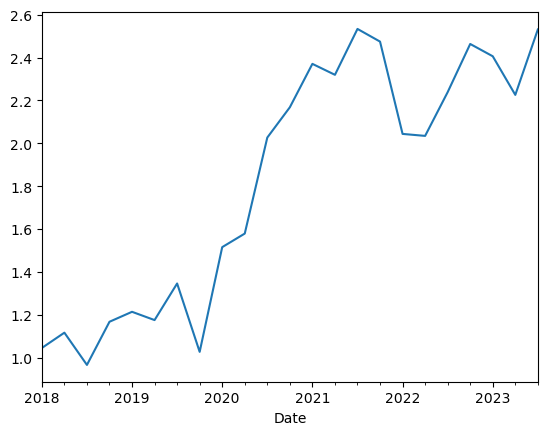

In [51]:
def Worst_Performers(date):
    all_returns = quarterly_cumulative_returns.loc[date]
    Worst = all_returns.nsmallest(50)
    Only_Worst_Performers_returns = quarterly_cumulative_returns.loc[Worst.name:].iloc[1:2][Worst.index]
    return Only_Worst_Performers_returns.mean(axis=1).values[0]

# calculating Total Returns
Total_Returns = [Worst_Performers(date) for date in quarterly_cumulative_returns.index[:-1]]

# Plotting cumulative returns
pd.Series(Total_Returns, index=quarterly_cumulative_returns.index[:-1]).cumprod().plot()

# Calculating average return across all quarters
average_return = np.mean(Total_Returns)

# Annualizing the average return (4 quarters in a year)
gross_return_annualized = (1 + average_return)**4 - 1

# Print gross_return_annualized
print("Gross Annualized Return :", gross_return_annualized)

[*********************100%%**********************]  1 of 1 completed
Tracking Error: 0.34513740769708584
Strategy Standard Deviation: 0.14987758116614333
Maximum Drawdown: -0.4400483883103924


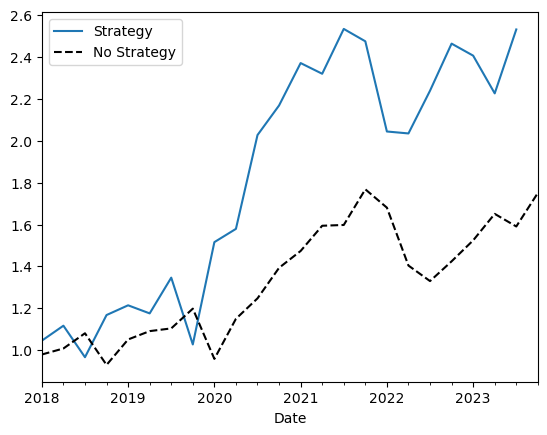

In [52]:
# Historical data for a benchmark index (S&P 500)
benchmark_symbol = '^GSPC' 
benchmark_data = yf.download(benchmark_symbol, start='2018-01-01')['Close']
benchmark_returns = benchmark_data.pct_change()

# calculating cumulative returns for the benchmark
quarterly_benchmark_returns = (1 + benchmark_returns).resample('Q').prod()

# calculating cumulative returns for not using the strategy
cumulative_returns_no_strategy = quarterly_benchmark_returns.cumprod()

# Plotting cumulative returns
fig, ax = plt.subplots()
strategy_returns = pd.Series(Total_Returns, index=quarterly_benchmark_returns.index[:-1]).cumprod()
strategy_returns.plot(ax=ax, label='Strategy')
cumulative_returns_no_strategy.plot(ax=ax, label='No Strategy', linestyle='--', color='black')
ax.legend()

# calculating excess returns
excess_returns = pd.Series(Total_Returns, index=quarterly_benchmark_returns.index[:-1]) - cumulative_returns_no_strategy

# calculating tracking error
tracking_error = excess_returns.std()

# Print tracking error
print("Tracking Error:", tracking_error)

# calculating standard deviation
strategy_std_dev = pd.Series(Total_Returns, index=quarterly_benchmark_returns.index[:-1]).std()

# Print standard deviation
print("Strategy Standard Deviation:", strategy_std_dev)

# calculating drawdown
def calculate_drawdown(series):
    # Calculate the cumulative maximum
    cum_max = series.cummax()
    # Calculate the drawdown series
    drawdown = (series - cum_max) / cum_max
    return drawdown

strategy_drawdown = calculate_drawdown(pd.Series(Total_Returns, index=quarterly_benchmark_returns.index[:-1]))

# Print maximum drawdown
max_drawdown = strategy_drawdown.min()
print("Maximum Drawdown:", max_drawdown)

plt.show()

In [53]:
# Creating a DataFrame to display cumulative returns
results_dict = {
    'Strategy': pd.Series(Total_Returns, index=quarterly_cumulative_returns.index[:-1]).cumprod(),
    'No Strategy': cumulative_returns_no_strategy
}

results_df = pd.DataFrame(results_dict)

# Loading risk-free rate data
rf_df = pd.read_excel(file_path, sheet_name='Risk Free Rate')
rf_df['Date'] = pd.to_datetime(rf_df['Date'])
rf_df.set_index('Date', inplace=True)

# Merge risk-free rate data with results_df
results_df = pd.merge(results_df, rf_df[['Rf']], left_index=True, right_index=True, how='left')

results_df['r-rf'] = results_df ['Strategy'] - results_df ['Rf']
results_df['rm-rf'] = results_df ['No Strategy'] - results_df ['Rf']


In [54]:
results_df

,Strategy,No Strategy,Rf,r-rf,rm-rf
Date,,,,,
2018-03-31,1.045695,0.979620,2.741,-1.695305,-1.761380
2018-06-30,1.117094,1.008369,2.849,-1.731906,-1.840631
2018-09-30,0.966707,1.080929,3.056,-2.089293,-1.975071
2018-12-31,1.167953,0.929906,2.686,-1.518047,-1.756094
2019-03-31,1.214404,1.051409,2.414,-1.199596,-1.362591
2019-06-30,1.175833,1.091234,2.000,-0.824167,-0.908766
2019-09-30,1.346457,1.104210,1.675,-0.328543,-0.570790
2019-12-31,1.027622,1.198445,1.919,-0.891378,-0.720555
2020-03-31,1.515939,0.958743,0.698,0.817939,0.260743


In [55]:
# Dropping rows with NaN values in 'r-rf' and 'rm-rf' columns
results_df_cleaned = results_df.dropna(subset=['r-rf', 'rm-rf'])

X = results_df_cleaned['rm-rf'].copy()
X = sm.add_constant(X)
y = results_df_cleaned['r-rf']

# model
model = sm.OLS(y, X)

# fitting
results = model.fit()

# Displaying the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   r-rf   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     196.3
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           3.99e-12
Time:                        04:38:01   Log-Likelihood:                -9.2850
No. Observations:                  23   AIC:                             22.57
Df Residuals:                      21   BIC:                             24.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5294      0.108      4.916      0.0